In [3]:
from scripts import clean_data
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv("./Data/clean_data.csv")
X = df
T = pd.read_csv("./Data/cleaned_data_combined_modified.csv")["Label"]


In [5]:
X_train, X_test, T_train, T_test = train_test_split(X, T, test_size=0.2, random_state=42)
X_train, X_valid, T_train, T_valid = train_test_split(X_train, T_train, test_size=0.2, random_state=42)
X_train = X_train.filter(regex='^(?!movie_).*', axis=1)
X_train = X_train.filter(regex='^(?!drink_).*', axis=1)
X_test = X_test.filter(regex='^(?!movie_).*', axis=1)
X_test = X_test.filter(regex='^(?!drink_).*', axis=1)
X_valid = X_valid.filter(regex='^(?!movie_).*', axis=1)
X_valid = X_valid.filter(regex='^(?!drink_).*', axis=1)
print(X_train)

      Teachers  Strangers  Friends  Family  Siblings  price  num_ingredients  \
1206         0          1        1       0         0      6                7   
1001         0          0        1       0         1      9               12   
54           1          0        1       0         1      5                5   
1002         1          0        1       0         0      5                9   
872          0          0        0       0         0      4                4   
...        ...        ...      ...     ...       ...    ...              ...   
219          1          0        1       0         0     10                7   
1371         0          0        0       0         0     20                5   
1515         0          0        1       0         1     15                6   
1417         0          0        1       0         1     15                3   
1408         1          0        0       0         0     10               10   

      complexity  Week day dinner  Week

In [6]:
def calculate_accuracy(i, j):
    clf = MLPClassifier(hidden_layer_sizes=(i, j), activation='relu', solver='adam', max_iter=1000, random_state=1)
    clf.fit(X_train, T_train)
    return clf.score(X_valid, T_valid)
        

In [11]:
hidden_layer_one = range(18, 26)
hidden_layer_two = range(9, 17)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

X, Y = np.meshgrid(hidden_layer_one, hidden_layer_two)
Z = np.zeros((8, 8))
for i in range(8):
    for j in range(8):
        Z[i][j] = calculate_accuracy(hidden_layer_one[i], hidden_layer_two[j])




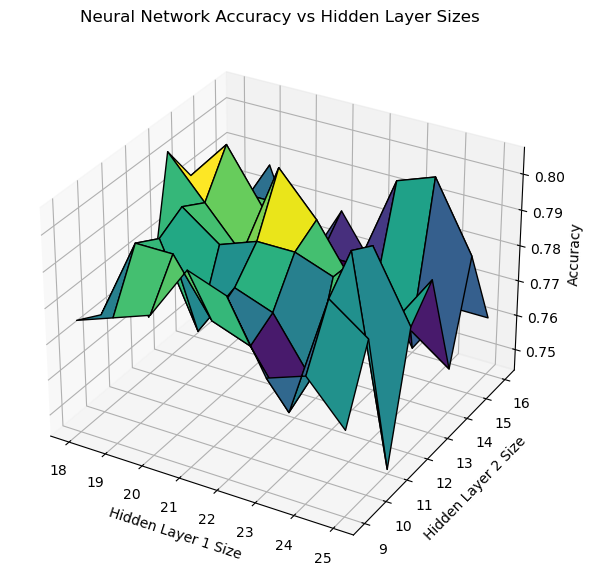

In [14]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
# Surface plot
ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='k')
# Labels
ax.set_xlabel('Hidden Layer 1 Size')
ax.set_ylabel('Hidden Layer 2 Size')
ax.set_zlabel('Accuracy')
ax.set_title('Neural Network Accuracy vs Hidden Layer Sizes')

plt.show()
